In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy import prod, arange

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 16})

# **Net Present Value**

**The net present value (NPV) of a project is the sum of the present values of each of the cash flows—positive as well as negative—that occurs over the life of the project. If the NPV of a project is positive a manager should accept the project; if it is negative the project should be rejected. The hurdle rate or the required rate of return is factored into the NPV, meaning that if the NPV is positive it exceeds the hurdle rate.**

**NPVs of a firm's projects are additive; an analyst can sum together all the NPVs to estimate the total value of a firm. For example if a grocery chain is reviewing investments in only two locations, then the value of the grocery chain is the sum of the NPVs of the two grocery store locations.**

$\Large{\sum_{t=1}^{t=N} \frac{CF_t}{(1+r)^t}} - \text{Initial Investment}$

$\text{Where: $CF_t$ is the cash flow in period t, $r$ is the discount rate and $N$ is the life of the project.}$

<sup>[Applied Corporate Finance](https://pages.stern.nyu.edu/~adamodar/pdfiles/acf4E/acf4Ebook.pdf) from NYU.edu by Aswath Damodaran</sup>

In [ ]:
project = {'Year':range(5),
           'Cashflow': [-1000000000,300000000,400000000,500000000,600000000]}

rate = .12

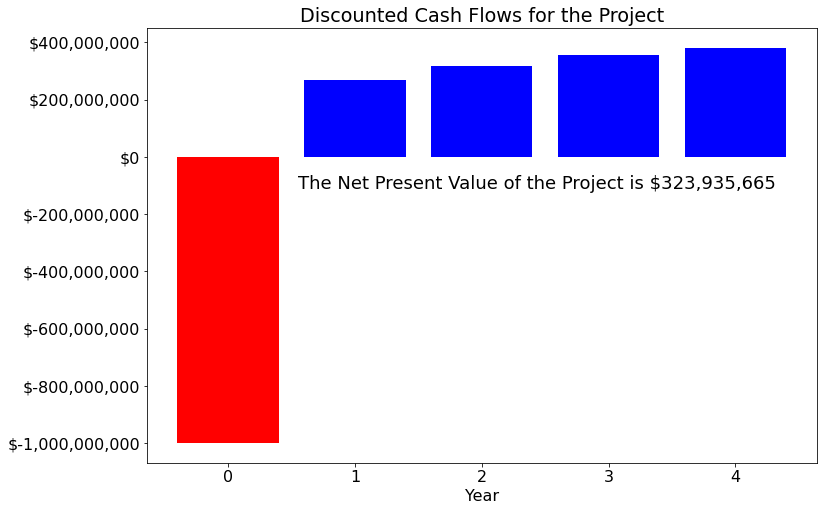

In [ ]:
fig_1, ax_1 = plt.subplots(1, 1)
npv = 0

for year, cf in zip(project['Year'],project['Cashflow']):
  if cf <= 0:
    plt.bar(x=year, height=cf/(1+rate)**year, color='red')
    npv += cf/(1+rate)**year
  else:
    plt.bar(x=year, height=cf/(1+rate)**year, color='blue')
    npv += cf/(1+rate)**year

tick = mtick.StrMethodFormatter('${x:,.0f}')
ax_1.yaxis.set_major_formatter(tick)
ax_1.set_title('Discounted Cash Flows for the Project')
ax_1.set_xlabel('Year')
plt.gcf().text(.3, 0.6, f'The Net Present Value of the Project is ${npv:,.0f}', fontsize=18);

## **Internal Rate of Return (Breakeven Rate) for the Project**

**The internal rate of return (IRR) is used to estimate the profitability of potential investments and is a popular tool within corporate finance. IRR is a discount rate that sets the net present value of all cash flows equal to zero in a discounted cash flow analysis. The IRR is a useful calculation when analysts are uncertain of the exact discount rate to use for their scenario analysis.**

**A few examples of IRR calculcations include: companies evaluating stock buy back programs, a capital investment in a car factory and an investor analyzing a potential real estate investment.**

<sup>[Internal Rate of Return (IRR)](https://www.investopedia.com/terms/i/irr.asp) from Investopedia.com by Jason Fernando</sup>

<sup>[Applied Corporate Finance](https://pages.stern.nyu.edu/~adamodar/pdfiles/acf4E/acf4Ebook.pdf) from NYU.edu by Aswath Damodaran</sup>

### **Solving for a Project's IRR**

**We can find the IRR of a project iteratively. In this case we will search for the root where the NPV is equal to 0. Given an initial estimate of the root, our algorithm will continuously increment the estimated root until the NPV calculation reaches close to 0.**

<sup>[Introduction to Numerical Methods (Algorithm)](https://www.fsb.miamioh.edu/lij14/202h_nm.pdf) by Jing Li</sup>

In [ ]:
def irr(cashflow_list, root = .05, increment = .001):
  
  '''Function that calculates the internal rate of return (IRR) for an investment.
     The function assumes that the cashflows are annual: for example the 
  
    Parameters
    ----------
    cashflow_list: list of the cashflows generated from the project including the initial investment
    root: Initial estimate of the root of the NPV at 0
    increment: number incremented to the estimated rate of the IRR
    
    Return
    ----------
    irr: returns the an estimated value of the IRR for a list of cashflows'''

  #seperate the initial investment period from the cashflowing periods
  periods = [period for period in range(len(cashflow_list))][1:]
  #index the initial investment within the cashflow_list and take the sum of the products for the cashflowing periods
  npv = cashflow_list[0] + sum([cashflow * root**period for cashflow,period in zip(cashflow_list[1:],periods)])
  while npv < 0:
    root = root + increment
    npv = cashflow_list[0] + sum([cashflow * root**period for cashflow,period in zip(cashflow_list[1:],periods)])

  #irr is the (1/root of the npv at 0) subtracted by 1
  irr = (1/root)-1
  return irr

project_irr = irr(project['Cashflow'])

## **NPV Profile**

**A NPV profile illustrates the estimated NPVs at various discount rates.**

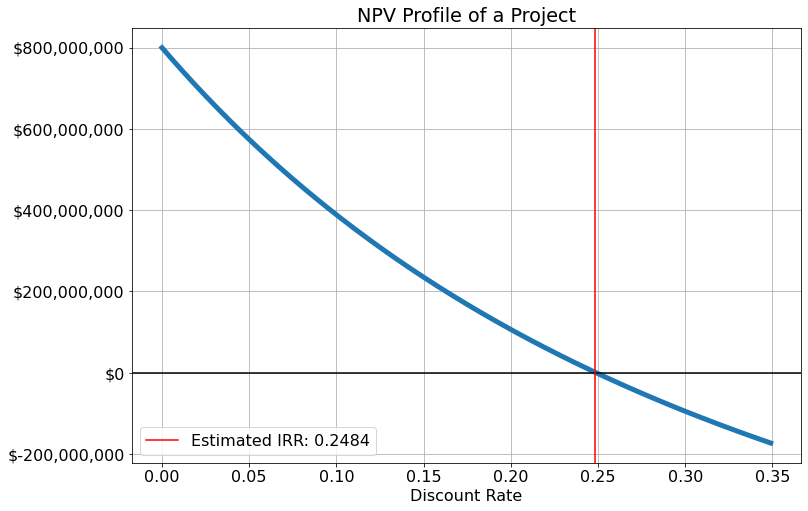

In [ ]:
breakeven_list = []

for rate in arange(0,.35,.001):
  breakeven_list.append(sum([cf/(1+rate)**year for year,cf in zip(project['Year'],project['Cashflow'])]))

fig_2, ax_2 = plt.subplots(1, 1)
ax_2.yaxis.set_major_formatter(tick)
ax_2.set_title('NPV Profile of a Project')
ax_2.set_xlabel('Discount Rate')
ax_2.plot(arange(0,.35,.001),breakeven_list,lw=5)
ax_2.axhline(color = 'black')
ax_2.axvline(project_irr,color = 'red',label=f'Estimated IRR: {project_irr:.4f}')
ax_2.grid()
ax_2.legend();

# **NPV with varying discount rates**

**Discount rates are time-varying, meaning they change over time. Per the example from Professor Damadoran, if we price a project for a technology company where the uncertainty about the research and development is high, we will need to apply higher discount rates over time.**

$\Large{\sum_{t=1}^{t=N} \frac{CF_t}{\prod_{j=1}^{j=t} (1+r_t)}} - \text{Initial Investment}$

$\text{Where: $CF_t$ is the cash flow in period t, $r$ is the one period discount rate that applies to period and $N$ is the life of the project.}$

<sup>[Applied Corporate Finance](https://pages.stern.nyu.edu/~adamodar/pdfiles/acf4E/acf4Ebook.pdf) NYU.edu by Aswath Damodaran</sup>

In [ ]:
tech_project = {'Year':range(5),
           'Cashflow': [-1000000000,300000000,400000000,500000000,600000000],
           'Discount Rates': [0,.1,.11,.12,.13]}

## **Calculating the Product of Discount Rates**

**Discount Rate Year 0: $0 + 1 = 1$**

**Discount Rate Year 1: $(0 + 1) * (.1 + 1) = 1.1$**

**Discount Rate Year 2: $(0 + 1) * (.1 + 1) * (.11 + 1) = 1.221$**

**Discount Rate Year 3: $(0 + 1) * (.1 + 1) * (.11 + 1) * (.12 + 1) = 1.36752$**

**Discount Rate Year 4: $(0 + 1) * (.1 + 1) * (.11 + 1) * (.12 + 1)* (.13 + 1) = 1.5452976$**

In [ ]:
compound_rate = []

for idx in range(len(tech_project['Discount Rates'])):
  compound_rate.append(prod([1 + rate for rate in tech_project['Discount Rates'][:idx+1]]))

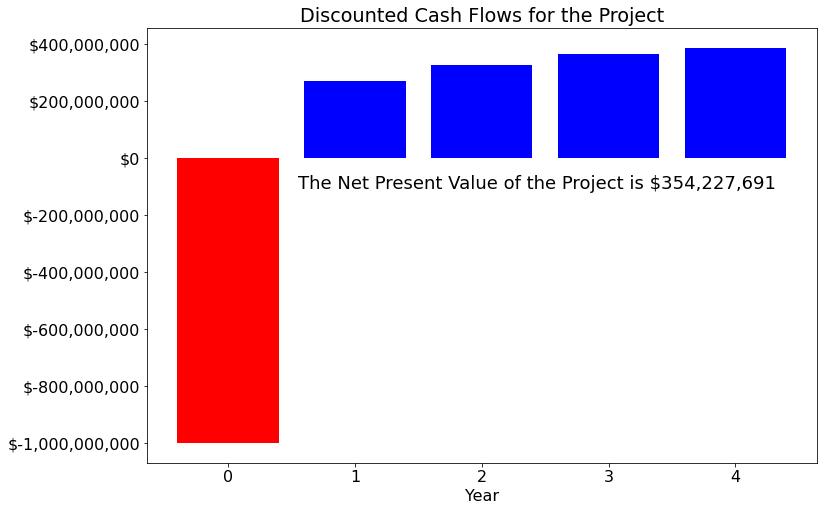

In [ ]:
fig_2, ax_2 = plt.subplots(1, 1)
npv_tech = 0

for year, cf, rate in zip(tech_project['Year'],tech_project['Cashflow'],compound_rate):
  if cf <= 0:
    plt.bar(x=year, height=cf/(rate), color='red')
    npv_tech += cf/(rate)
  else:
    plt.bar(x=year, height=cf/(rate), color='blue')
    npv_tech += cf/(rate)

tick = mtick.StrMethodFormatter('${x:,.0f}')
ax_2.yaxis.set_major_formatter(tick)
ax_2.set_title('Discounted Cash Flows for the Project')
ax_2.set_xlabel('Year')
plt.gcf().text(.3, 0.6, f'The Net Present Value of the Project is ${npv_tech:,.0f}', fontsize=18);

# **References and Additional Learning**

## **Textbook**

- **[Applied Corporate Finance](https://pages.stern.nyu.edu/~adamodar/pdfiles/acf4E/acf4Ebook.pdf) from NYU.edu by Aswath Damodaran**


## **Websites**

- **[Internal Rate of Return (IRR)](https://www.investopedia.com/terms/i/irr.asp) from Investopedia.com by Jason Fernando**

- **[Introduction to Numerical Methods (Algorithm)](https://www.fsb.miamioh.edu/lij14/202h_nm.pdf) by Jing Li**

- **[Musings on Markets](https://aswathdamodaran.blogspot.com/) - Financial blog for Aswath Damodaran** 

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**